# ✉️ Spam Mail Detection Using Logistic Regression

## 🧠 Objective
The goal of this project is to build a machine learning model that can automatically classify emails as **spam** or **not spam** based on their content. We will use **Logistic Regression**, a simple yet powerful linear model, well-suited for binary classification tasks like this.

## 📄 Dataset
We will use a labeled dataset that contains:
- **Email text**
- **Labels** indicating whether the message is `spam` or `ham` (not spam)

## 🔍 Problem Type
- **Supervised Learning**
- **Binary Classification**

## ⚙️ Algorithm Used
We will train a **Logistic Regression** model, which works by estimating the probability that a given input belongs to a certain class. It's widely used in spam detection due to its efficiency and interpretability.

## 🛠️ What You'll Learn
- Text cleaning and preprocessing (removing stopwords, punctuations, etc.)
- Converting text to numerical format using **TF-IDF** or **CountVectorizer**
- Building and training a **Logistic Regression** classifier
- Evaluating the model using **accuracy**, **precision**, **recall**, and **F1-score**

## 📦 Libraries Used
- `pandas`, `numpy` for data handling  
- `nltk`, `re` for text preprocessing  
- `scikit-learn` for modeling and evaluation  
- `matplotlib`, `seaborn` for data visualization

---

✅ Let's begin by importing the necessary libraries and loading the dataset.


In [23]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#creating Pandas DataFrame from CSV file

mail_data=pd.read_csv('mail_data.csv')

In [ ]:
#Printing first 5 row of dataFrame

mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Finding the the Number of Rows and Column

mail_data.shape

(5572, 2)

In [ ]:
#Finding the Missing Value
mail_data.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#Finding the destribution of Category

mail_data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
#Some important info...
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Finding some Statical Measure

mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


Label Encoding

In [ ]:
#Label encoding by using 'replace'

#spam mail as 0 , ham mail as 1

mail_data.replace({'Category' : {'spam': 0, 'ham': 1}}, inplace=True)

C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_54732\3312295695.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data.replace({'Category' : {'spam': 0, 'ham': 1}}, inplace=True)


In [16]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#Seperating the data into Label and text

# X-> text , Y-> label

X= mail_data['Message']
Y=mail_data['Category']

Splitting the data into Training and Testing data

In [21]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [24]:
#Tranform text data to feature vector which is used to train the Model

feature_extraction=TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_feature=feature_extraction.fit_transform(X_train)

X_test_feature= feature_extraction.transform(X_test)



Training Model

LogisticRegression

In [27]:
model=LogisticRegression()

In [28]:
#Training the model

model.fit(X_train_feature, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluation

In [ ]:
#Finding Accuracy score of this Model on Training data

Y_train_prediction=model.predict(X_train_feature)
Y_train_score=accuracy_score(Y_train_prediction, Y_train)
print(Y_train_score)

0.9685887368184878


In [30]:
#Finding Accuracy score of this Model on Testing data

Y_test_prediction=model.predict(X_test_feature)
Y_test_score=accuracy_score(Y_test_prediction, Y_test)
print(Y_test_score)

0.9533632286995516


Making Predective System

In [43]:
input_mail=["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]

#Feature Extraction

input_data=feature_extraction.transform(input_mail)

#predicting the label value for above message
prediction_value= model.predict(input_data)

if(prediction_value==1):
    print('It is a Ham mail')

else:
    print('It is a Spam mail')

It is a Spam mail


<Figure size 200x200 with 0 Axes>

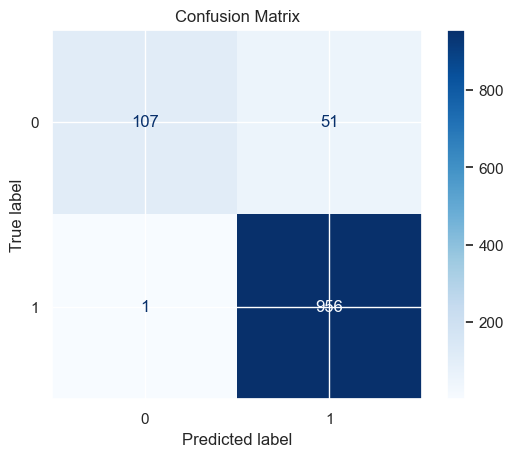

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_test_prediction)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [48]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(Y_test, Y_test_prediction))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.68      0.80       158
           1       0.95      1.00      0.97       957

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



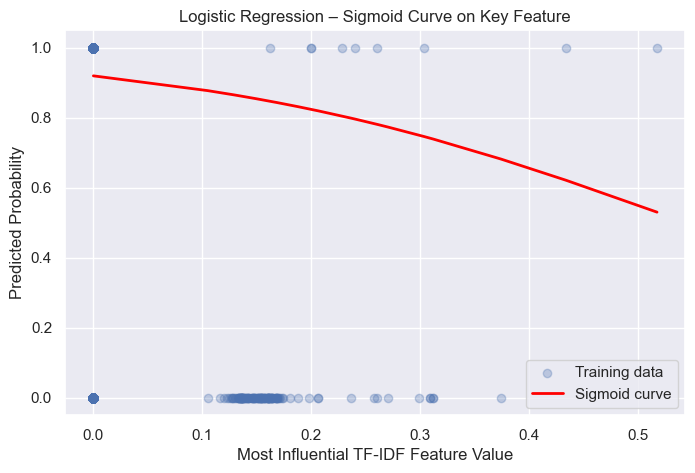

In [54]:
# Find index of most important feature (highest absolute weight)
most_important_idx = np.argmax(np.abs(model.coef_[0]))
X_important = X_dense[:, most_important_idx]
X_sorted = np.sort(X_important)

# Recompute sigmoid using this feature
w = model.coef_[0][most_important_idx]
b = model.intercept_[0]
linear_output = w * X_sorted + b
sigmoid_output = expit(linear_output)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_important, Y_train, alpha=0.3, label="Training data")
plt.plot(X_sorted, sigmoid_output, color='red', linewidth=2, label="Sigmoid curve")
plt.xlabel("Most Influential TF-IDF Feature Value")
plt.ylabel("Predicted Probability")
plt.title("Logistic Regression – Sigmoid Curve on Key Feature")
plt.legend()
plt.grid(True)
plt.show()
